In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [15]:
df = pd.read_csv("Academic-Performance-Dataset.csv")
df

,Unnamed: 0,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,0,1.0,Mohammed,M,Comp,72.0,62.0,98.0,63.0,89.0,36.0,368.0,73.6
1,1,2.0,Reyansh,M,IT,58.0,62.0,83.0,83.0,88.0,34.0,350.0,70.0
2,2,3.0,Aarav,M,IT,57.0,-20.0,100.0,NaN,56.0,36.0,192.0,38.4
3,3,4.0,Atharv,M,IT,60.0,89.0,83.0,70.0,33.0,23.0,298.0,59.6
4,4,5.0,Vivaan,M,Comp,85.0,90.0,NaN,78.0,23.0,56.0,247.0,49.4
5,5,6.0,Advik,M,ENTC,94.0,99.0,84.0,100.0,56.0,99.0,438.0,87.6
6,6,7.0,Ansh,M,ENTC,98.0,88.0,95.0,81.0,78.0,78.0,420.0,84.0
7,7,8.0,Ishaan,M,ENTC,75.0,66.0,51.0,83.0,-99.0,76.0,192.0,38.4
8,8,9.0,Dhruv,M,ENTC,63.0,NaN,NaN,97.0,56.0,55.0,208.0,41.6
9,9,10.0,Siddharth,M,ENTC,96.0,67.0,78.0,95.0,NaN,98.0,338.0,67.6


In [16]:
df.shape

(20, 13)

In [17]:
df.dtypes

Unnamed: 0       int64
Rollno         float64
Name            object
Gender          object
Branch          object
Attendence     float64
Phy_marks      float64
Che_marks      float64
EM1_marks      float64
PPS_marks      float64
SME_marks      float64
Total Marks    float64
Percentage     float64
dtype: object

In [18]:

#Handle the Missing value
#Handle the Missing value

df.isna().sum()

Unnamed: 0     0
Rollno         1
Name           2
Gender         1
Branch         1
Attendence     1
Phy_marks      2
Che_marks      4
EM1_marks      3
PPS_marks      2
SME_marks      1
Total Marks    1
Percentage     1
dtype: int64

In [19]:
#Make a list of column having missing value

cols_with_na = []
for col in df.columns:
    if df[col].isna().any():
        cols_with_na.append(col)

cols_with_na

['Rollno',
 'Name',
 'Gender',
 'Branch',
 'Attendence',
 'Phy_marks',
 'Che_marks',
 'EM1_marks',
 'PPS_marks',
 'SME_marks',
 'Total Marks',
 'Percentage']

In [20]:
#Fill the missing value using mean for float and int datatypes and for other forword fill

for col in cols_with_na:
    col_dt = df[col].dtypes
    if (col_dt == 'int64' or col_dt == 'float64'):
        outliers = (df[col] < 0) | (100 < df[col])
        df.loc[outliers, col] = np.nan
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(method='ffill')
df

,Unnamed: 0,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,0,1.0,Mohammed,M,Comp,72.000000,62.0000,98.00,63.000000,89.000000,36.000000,NaN,73.600000
1,1,2.0,Reyansh,M,IT,58.000000,62.0000,83.00,83.000000,88.000000,34.000000,NaN,70.000000
2,2,3.0,Aarav,M,IT,57.000000,73.9375,100.00,82.882353,56.000000,36.000000,NaN,38.400000
3,3,4.0,Atharv,M,IT,60.000000,89.0000,83.00,70.000000,33.000000,23.000000,NaN,59.600000
4,4,5.0,Vivaan,M,Comp,85.000000,90.0000,80.75,78.000000,23.000000,56.000000,NaN,49.400000
5,5,6.0,Advik,M,ENTC,94.000000,99.0000,84.00,100.000000,56.000000,99.000000,NaN,87.600000
6,6,7.0,Ansh,M,ENTC,98.000000,88.0000,95.00,81.000000,78.000000,78.000000,NaN,84.000000
7,7,8.0,Ishaan,M,ENTC,75.000000,66.0000,51.00,83.000000,69.882353,76.000000,NaN,38.400000
8,8,9.0,Dhruv,M,ENTC,63.000000,73.9375,80.75,97.000000,56.000000,55.000000,NaN,41.600000
9,9,10.0,Siddharth,M,ENTC,96.000000,67.0000,78.00,95.000000,69.882353,98.000000,NaN,67.600000


In [22]:
df['Total Marks']=df['Phy_marks']+df['Che_marks']+df['EM1_marks']+df['PPS_marks']+df['SME_marks']
df['Percentage']=df['Total Marks']/5

df

,Unnamed: 0,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,0,1.0,Mohammed,M,Comp,72.000000,62.0000,98.00,63.000000,89.000000,36.000000,348.000000,69.600000
1,1,2.0,Reyansh,M,IT,58.000000,62.0000,83.00,83.000000,88.000000,34.000000,350.000000,70.000000
2,2,3.0,Aarav,M,IT,57.000000,73.9375,100.00,82.882353,56.000000,36.000000,348.819853,69.763971
3,3,4.0,Atharv,M,IT,60.000000,89.0000,83.00,70.000000,33.000000,23.000000,298.000000,59.600000
4,4,5.0,Vivaan,M,Comp,85.000000,90.0000,80.75,78.000000,23.000000,56.000000,327.750000,65.550000
5,5,6.0,Advik,M,ENTC,94.000000,99.0000,84.00,100.000000,56.000000,99.000000,438.000000,87.600000
6,6,7.0,Ansh,M,ENTC,98.000000,88.0000,95.00,81.000000,78.000000,78.000000,420.000000,84.000000
7,7,8.0,Ishaan,M,ENTC,75.000000,66.0000,51.00,83.000000,69.882353,76.000000,345.882353,69.176471
8,8,9.0,Dhruv,M,ENTC,63.000000,73.9375,80.75,97.000000,56.000000,55.000000,362.687500,72.537500
9,9,10.0,Siddharth,M,ENTC,96.000000,67.0000,78.00,95.000000,69.882353,98.000000,407.882353,81.576471


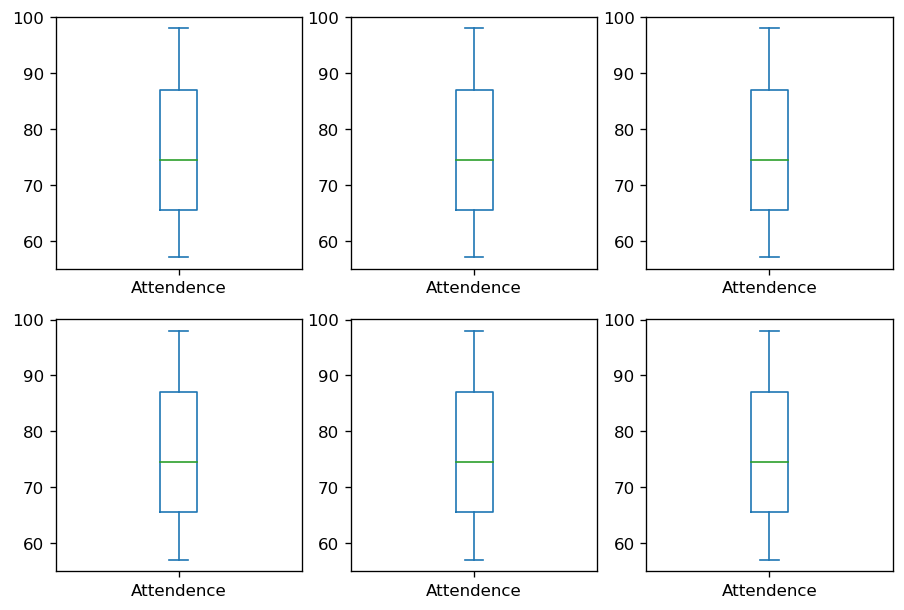

In [23]:
#Outliers Detection

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 6)
df_list = ['Attendence', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks', 'SME_marks']
fig, axes = plt.subplots(2, 3)
fig.set_dpi(120)

count=0
for r in range(2):
    for c in range(3):
        _ = df[df_list[count]].plot(kind = 'box', ax=axes[r,c])

In [24]:
#Removal of Outliers from Che_marks

Q1 = df['Che_marks'].quantile(0.25)
Q3 = df['Che_marks'].quantile(0.75)
IQR = Q3 - Q1

Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR

print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')

Q1 = 76.0, Q3 = 86.25, IQR = 10.25, Lower_limit = 60.625, Upper_limit = 101.625


In [25]:
df[(df['Che_marks'] < Lower_limit) | (df['Che_marks'] > Upper_limit)]

,Unnamed: 0,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
7,7,8.0,Ishaan,M,ENTC,75.0,66.0,51.0,83.0,69.882353,76.0,345.882353,69.176471
14,14,15.0,Maryam,F,IT,64.0,87.0,60.0,90.0,65.000000,90.0,392.000000,78.400000


In [26]:
#Convert Into Normal Distribution
#BINNING USING FREQUENy

def BinningFunction(column, cut_points, labels = None) :
    break_points=[column.min()] + cut_points + [column.max( )]
    print('Gradding According to percentage \n>60 = F \n60-70 = B \n70-80 = A\n80-100 = O')
    return pd.cut(column, bins=break_points, labels=labels, include_lowest=True)

In [27]:
cut_points=[60, 70, 80]
labels=['F', 'B', 'A', 'O']
df['Grade']=BinningFunction(df['Percentage'], cut_points, labels)

df

Gradding According to percentage 
>60 = F 
60-70 = B 
70-80 = A
80-100 = O


,Unnamed: 0,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage,Grade
0,0,1.0,Mohammed,M,Comp,72.000000,62.0000,98.00,63.000000,89.000000,36.000000,348.000000,69.600000,B
1,1,2.0,Reyansh,M,IT,58.000000,62.0000,83.00,83.000000,88.000000,34.000000,350.000000,70.000000,B
2,2,3.0,Aarav,M,IT,57.000000,73.9375,100.00,82.882353,56.000000,36.000000,348.819853,69.763971,B
3,3,4.0,Atharv,M,IT,60.000000,89.0000,83.00,70.000000,33.000000,23.000000,298.000000,59.600000,F
4,4,5.0,Vivaan,M,Comp,85.000000,90.0000,80.75,78.000000,23.000000,56.000000,327.750000,65.550000,B
5,5,6.0,Advik,M,ENTC,94.000000,99.0000,84.00,100.000000,56.000000,99.000000,438.000000,87.600000,O
6,6,7.0,Ansh,M,ENTC,98.000000,88.0000,95.00,81.000000,78.000000,78.000000,420.000000,84.000000,O
7,7,8.0,Ishaan,M,ENTC,75.000000,66.0000,51.00,83.000000,69.882353,76.000000,345.882353,69.176471,B
8,8,9.0,Dhruv,M,ENTC,63.000000,73.9375,80.75,97.000000,56.000000,55.000000,362.687500,72.537500,A
9,9,10.0,Siddharth,M,ENTC,96.000000,67.0000,78.00,95.000000,69.882353,98.000000,407.882353,81.576471,O
